#Question2- Regression

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.models import Sequential
from sklearn.model_selection import  train_test_split

In [4]:
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


---
>Removing zero prices & zero bedrooms $ zero bathrooms & the 2 most expensive houses 

In [5]:
data = data[data.price != 0]
data = data[data.bedrooms != 0]
data = data[data.bathrooms != 0] 
data = data[data.price < 1e+07]

In [ ]:
data.shape

(4547, 18)

---
> targets

In [6]:
Y = data['price'].values.reshape(-1,1)
Y = np.asanyarray(Y)

In [ ]:
Y.shape

(4547, 1)

---
> Dropout 'price', 'date', 'city', 'country', 'statezip', 'street'  from data

In [ ]:
X = data.drop(['price'], axis = 1)
X = X.drop(['date'], axis = 1)
X = X.drop(['city'], axis = 1)
X = X.drop(['country'], axis = 1)
X = X.drop(['statezip'], axis = 1)
X = X.drop(['street'], axis = 1)

In [ ]:
X.shape

(4547, 12)

---
> One_Hot_ٍEncoding for String Features

In [ ]:
data_street_dummy = np.asanyarray(pd.get_dummies(data['street'],prefix = 'street'))
data_city_dummy = np.asanyarray(pd.get_dummies(data['city'],prefix = 'city'))
data_statezip_dummy = np.asanyarray(pd.get_dummies(data['statezip'],prefix = 'statezip'))
data_country_dummy = np.asanyarray(pd.get_dummies(data['country'],prefix = 'country'))
data_street_dummy

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

---
>Normalizing data

In [ ]:
X = np.asanyarray(X)
min2 = (np.min(X,axis = 0)).reshape(1,12)
max2 = (np.max(X,axis = 0)).reshape(1,12)
X = (X - min2) / (max2 - min2)
X = X.astype(np.float32)

In [ ]:
X.shape


(4547, 12)

---
>Concatenate 'city', 'country', 'statezip', 'street' to dataset

In [ ]:
X = np.concatenate([X, data_street_dummy, data_city_dummy, data_statezip_dummy,
               data_country_dummy], axis=1)
X.shape

(4547, 4606)

---
> Train & Test Split 

In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(X, Y,
                              test_size=0.2, shuffle = True, random_state = 7)

In [ ]:
train_data.shape

(3637, 4606)

---
>Model

In [ ]:
model = Sequential()
model.add(Dense(4608,input_dim = 4606, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])
start = datetime.datetime.now()
trained_Model = model.fit(train_data, train_targets, validation_split=0.15,
                    epochs = 20, batch_size = 512)
end = datetime.datetime.now()

Epoch 1/20
7/7 [==============================] - 4s 92ms/step - loss: 446782996480.0000 - mae: 549838.0625 - mse: 446782996480.0000 - val_loss: 496458465280.0000 - val_mae: 581694.9375 - val_mse: 496458465280.0000
Epoch 2/20
7/7 [==============================] - 0s 48ms/step - loss: 430641643520.0000 - mae: 535792.6250 - mse: 430641643520.0000 - val_loss: 426185752576.0000 - val_mae: 520702.7812 - val_mse: 426185752576.0000
Epoch 3/20
7/7 [==============================] - 0s 48ms/step - loss: 291422633984.0000 - mae: 387796.8438 - mse: 291422633984.0000 - val_loss: 139719786496.0000 - val_mae: 224705.9219 - val_mse: 139719786496.0000
Epoch 4/20
7/7 [==============================] - 0s 48ms/step - loss: 152489951232.0000 - mae: 300568.4062 - mse: 152489951232.0000 - val_loss: 115845898240.0000 - val_mae: 210748.6562 - val_mse: 115845898240.0000
Epoch 5/20
7/7 [==============================] - 0s 49ms/step - loss: 116530978816.0000 - mae: 192702.2656 - mse: 116530978816.0000 - val_l

#Plotting learning Curves

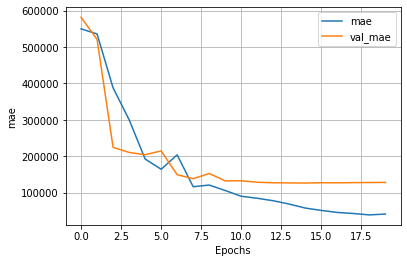

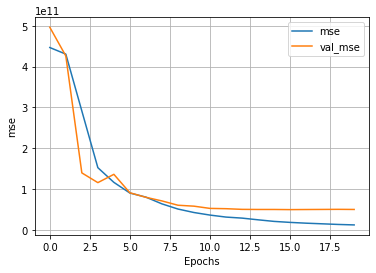

In [ ]:
history = trained_Model.history
loss = history['loss']
val_loss = history['val_loss']
mae = history['mae']
val_mae = history['val_mae']
mse = history['mse']
val_mse = history['val_mse']

# Plotting Loss & MAE Curves 
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.plot(mae)
plt.plot(val_mae)
plt.legend(['mae','val_mae'])
plt.grid()
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.plot(mse)
plt.plot(val_mse)
plt.legend(['mse','val_mse'])
plt.grid()

#Evaluate Model

In [ ]:
# Determining Traning Time & Test Loss & Test mae
Training_Time = end - start
print ('Training_Time:', Training_Time)
test_loss, test_mae, test_mse = model.evaluate(test_data, test_targets, verbose=0)
y_pred = model.predict(test_data)
y_target = test_targets
diff = y_target - y_pred
result = np.concatenate((y_target, y_pred, diff), axis=1)
result = np.round(result, 1)
df = pd.DataFrame(result, columns=['True Price', 'Predicted Price', 'Difference'])

print('Test_loss:', test_loss)
print('Test_mse:', test_mae)

Training_Time: 0:00:10.936812
Test_loss: 28931065856.0
Test_mse: 101302.1015625


#Display true price, predicted price and their difference (for test dataset)

In [ ]:
df

,True Price,Predicted Price,Difference
0,413000.0,318488.9,94511.1
1,371500.0,296400.2,75099.8
2,660000.0,677062.4,-17062.4
3,424000.0,418166.1,5833.9
4,406000.0,404296.4,1703.6
...,...,...,...
905,570000.0,503347.0,66653.0
906,590000.0,528568.8,61431.2
907,255000.0,246525.2,8474.8
908,805000.0,1269826.6,-464826.6


Text(0, 0.5, 'cost')

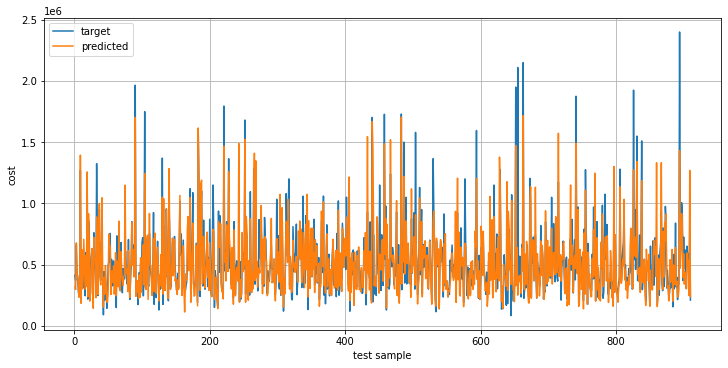

In [ ]:
new = np.arange(1,len(y_target)+1)
fig, axs = plt.subplots(1, 1, figsize=(10,5), constrained_layout=True)
plt.plot(new,y_target)
plt.plot(new,y_pred)
plt.legend(['target','predicted'])
plt.grid()
plt.xlabel('test sample')
plt.ylabel('cost')

---
> Part D of Question 3

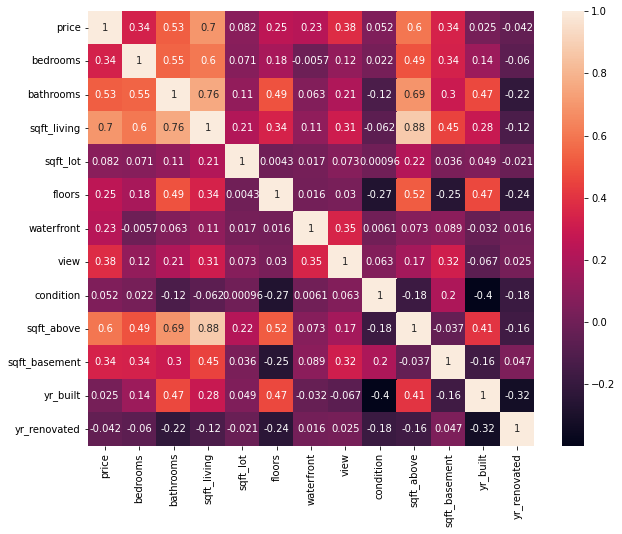

In [7]:
from seaborn import heatmap
labels = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
            'waterfront','view','condition','sqft_above','sqft_basement','yr_built',
            'yr_renovated','street','city','statezip','country']
correlation = data.loc[:,labels].corr()
plt.subplots(figsize=(10,8))
heatmap(correlation, annot=True)

---
> Part V of Question 3

---
> Linear Regression

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [13]:
labels_new=[ 'bedrooms',
            'bathrooms',
            'sqft_living',
            'sqft_lot',
            'floors',
            'waterfron',
            'view',
            'condition',
            'sqft_above',
            'sqft_basement',
            'yr_built',
            'yr_renovated',
            'street',
            'city',
            'statezip',
            'country']

In [16]:
X_new = data.drop(['price'], axis = 1)
X_new = X_new.drop(['date'], axis = 1)
X_new = np.asanyarray(X_new)

In [17]:
label_e = LabelEncoder()
X_new[:, 15] = label_e.fit_transform(X_new[:, 15])
X_new[:, 14] = label_e.fit_transform(X_new[:, 14])
X_new[:, 13] = label_e.fit_transform(X_new[:, 13])
X_new[:, 12] = label_e.fit_transform(X_new[:, 12])
normal = StandardScaler()
normal = normal.fit(X_new)
X_new[:] = normal.transform(X_new)
X_new= pd.DataFrame(data=X_new, index=None, columns=labels_new)
X_new

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfron,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,-0.439339,-0.846062,-0.82888,-0.192493,-0.022085,-0.081496,-0.306396,-0.665735,-0.564255,-0.671541,-0.530353,1.222491,-0.567167,0.859962,1.113002,0.0
1,1.777836,0.44381,1.589372,-0.160859,0.907723,-0.081496,4.921312,2.296199,1.814677,-0.06554,-1.672646,-0.825124,1.246883,0.776442,0.921447,0.0
2,-0.439339,-0.201126,-0.211231,-0.080331,-0.951892,-0.081496,-0.306396,0.815232,0.127158,-0.671541,-0.160788,-0.825124,0.020232,-0.643401,-0.610988,0.0
3,-0.439339,0.121342,-0.137951,-0.189213,-0.951892,-0.081496,-0.306396,0.815232,-0.962697,1.492748,-0.261578,-0.825124,1.52704,-1.896203,-1.520871,0.0
4,0.669248,0.44381,-0.200762,-0.120554,-0.951892,-0.081496,-0.306396,0.815232,-0.798633,1.05989,0.175181,1.209215,1.595918,0.442361,-0.371545,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542,-0.439339,-0.523594,-0.650913,-0.235634,-0.951892,-0.081496,-0.306396,0.815232,-0.365034,-0.671541,-0.56395,1.195939,0.900171,0.776442,1.113002,0.0
4543,-0.439339,0.44381,-0.703256,-0.201916,0.907723,-0.081496,-0.306396,-0.665735,-0.423629,-0.671541,0.410359,1.226576,-0.999784,-1.896203,-1.56876,0.0
4544,-0.439339,0.44381,0.919381,-0.217454,0.907723,-0.081496,-0.306396,-0.665735,1.392798,-0.671541,1.283877,-0.825124,1.349814,0.525881,-0.084213,0.0
4545,0.669248,-0.201126,-0.043733,-0.228129,-0.951892,-0.081496,-0.306396,-0.665735,-0.880665,1.536034,0.107987,-0.825124,0.938866,0.776442,1.543999,0.0


In [20]:
L_Regression = LinearRegression()
L_Regression.fit(X_new,Y)
s = L_Regression.coef_
s = s.reshape(-1,1)

normal = StandardScaler()
normal = normal.fit(s)
s[:] = normal.transform(s)
s = s.reshape(16)

0 - bedrooms  importance= -1.3081978820313023
1 - bathrooms  importance= 0.38215681706378296
2 - sqft_living  importance= 2.0780934941673124
3 - sqft_lot  importance= -0.9089984690192799
4 - floors  importance= 0.1156514436239792
5 - waterfron  importance= 0.32780542681068325
6 - view  importance= 0.42947031155107673
7 - condition  importance= -0.014298699772895636
8 - sqft_above  importance= 1.8604754755270172
9 - sqft_basement  importance= 0.5530711865541977
10 - yr_built  importance= -1.892686923180659
11 - yr_renovated  importance= -0.23979762668014043
12 - street  importance= -0.30324959745617497
13 - city  importance= 0.2910159512492467
14 - statezip  importance= -0.9763900667269162
15 - country  importance= -0.39412084167992895


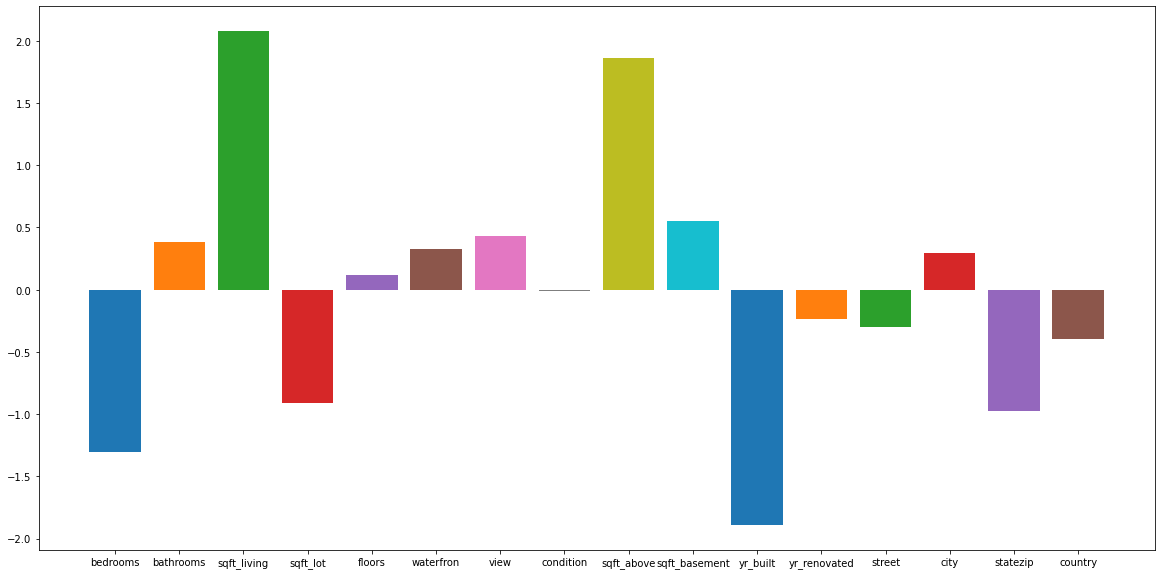

In [27]:
plt.subplots(figsize=(20,10))
for i in range(16):
    print(i,'-', labels_new[i], " importance=", s[i])
    plt.bar(labels_new[i], s[i]) 

---
> Decosion Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor
Dec_Tree_Reg = DecisionTreeRegressor()
Dec_Tree_Reg.fit(X_new, Y)
s = Dec_Tree_Reg.feature_importances_
s = s.reshape(-1,1)

normal = StandardScaler()
normal = normal.fit(s)
s[:] = normal.transform(s)
s = s.reshape(16)

1 - bedrooms  importance =  -0.45932295416003127
2 - bathrooms  importance =  -0.27937003524178106
3 - sqft_living  importance =  3.805796885909259
4 - sqft_lot  importance =  -0.08510917317351004
5 - floors  importance =  -0.40469944972261596
6 - waterfron  importance =  -0.1269822356180613
7 - view  importance =  -0.2918719369578456
8 - condition  importance =  -0.42406439805312324
9 - sqft_above  importance =  -0.22800203475859676
10 - sqft_basement  importance =  -0.4301216179885942
11 - yr_built  importance =  -0.14429437169450365
12 - yr_renovated  importance =  -0.36788924005010665
13 - street  importance =  -0.22646453604816164
14 - city  importance =  -0.08890954646235051
15 - statezip  importance =  0.25738956714243716
16 - country  importance =  -0.5060849231224147


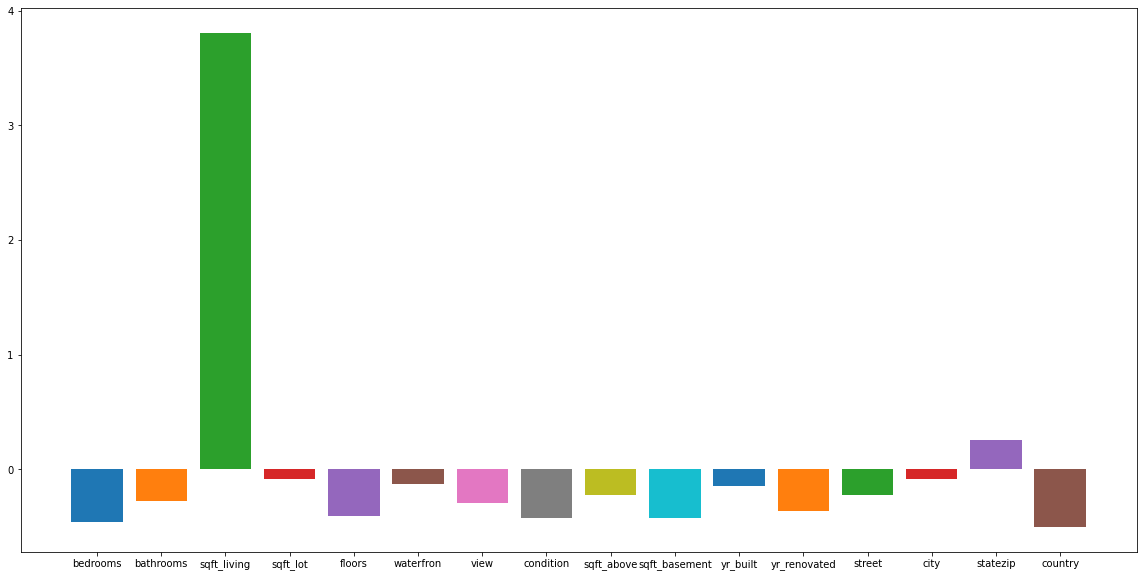

In [33]:
plt.subplots(figsize=(20,10))
for i in range(16):
    print(i+1,'-', labels_new[i], " importance = ", s[i])
    plt.bar(labels_new[i], s[i]) 